In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

<h3>SARIMA</h3>

In [3]:
df = pd.read_csv('df_eng.csv',index_col='data_hora',parse_dates=True)

In [4]:
df =df.asfreq('W')

In [5]:
print(df.index.freq)

<Week: weekday=6>


In [11]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [12]:
model = auto_arima(train['Radiacao (KJ/m²)'],seasonal=True,m=52,stepwise=True,suppress_warnings=True)
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 52)   Log Likelihood                -562.565
Date:                            Wed, 12 Feb 2025   AIC                           1133.131
Time:                                    09:16:16   BIC                           1142.854
Sample:                                01-29-2023   HQIC                          1137.040
                                     - 09-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1596.4944     38.173     41.823      0.000    1521.677    1671.312
ma.L1          0.4440      0.096   

In [30]:
forecast = model.predict(n_periods=len(test))

In [31]:
test['forecast'] = forecast

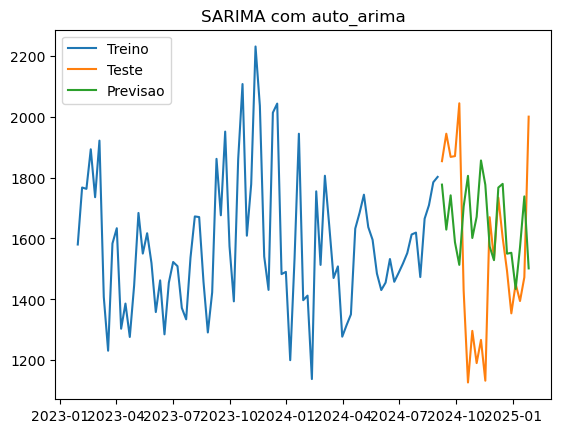

In [32]:
plt.plot(train.index, train['Radiacao (KJ/m²)'],label="Treino")
plt.plot(test.index, test['Radiacao (KJ/m²)'],label="Teste")
plt.plot(test.index, test['forecast'],label="Previsao")
plt.legend()
plt.title('SARIMA com auto_arima')
plt.show()

In [42]:
# Cálculo das métricas
mae = mean_absolute_error(test['Radiacao (KJ/m²)'], test['forecast'])
rmse = np.sqrt(mean_squared_error(test['Radiacao (KJ/m²)'], test['forecast']))
mape = mean_absolute_percentage_error(test['Radiacao (KJ/m²)'], test['forecast'])
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 277.38
The RMSE is 347.72
The MAPE is 19.47 %


<h3>SARIMA com train_test_split de 0.8</h3>

In [25]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [12]:
SARIMA_model = auto_arima(train['Radiacao (KJ/m²)'], exogenous=train['Temp. Ins. (C)'],test = 'adf',seasonal=True,m=52,stepwise=True,suppress_warnings=True)
print(SARIMA_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   78
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 52)   Log Likelihood                -518.738
Date:                             Fri, 14 Feb 2025   AIC                           1047.475
Time:                                     13:19:55   BIC                           1059.194
Sample:                                 01-29-2023   HQIC                          1052.163
                                      - 07-21-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2719      0.124      2.185      0.029       0.028       0.516
ar.L2         -0.3009      

In [13]:
forecast = SARIMA_model.predict(n_periods=len(test))

In [14]:
test['forecast_sarima'] = forecast

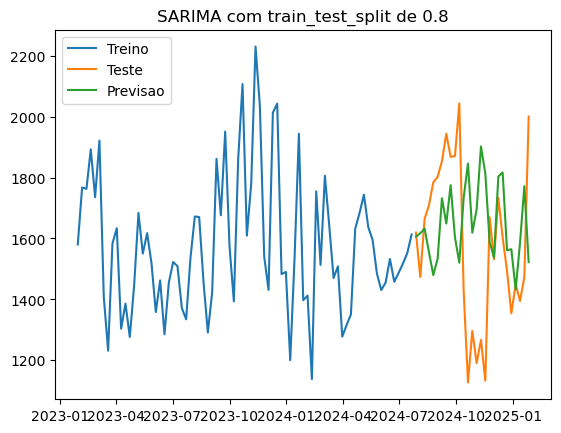

In [16]:
plt.plot(train.index, train['Radiacao (KJ/m²)'],label="Treino")
plt.plot(test.index, test['Radiacao (KJ/m²)'],label="Teste")
plt.plot(test.index, test['forecast_sarima'],label="Previsao")
plt.legend()
plt.title('SARIMA com train_test_split de 0.8')
plt.show()

In [17]:
# Cálculo das métricas
mae = mean_absolute_error(test['Radiacao (KJ/m²)'], test['forecast_sarima'])
rmse = np.sqrt(mean_squared_error(test['Radiacao (KJ/m²)'], test['forecast_sarima']))
mape = mean_absolute_percentage_error(test['Radiacao (KJ/m²)'], test['forecast_sarima'])
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 259.97
The RMSE is 331.28
The MAPE is 17.95 %


<h3>SARIMA - train_test_split de 0.75</h3>

In [18]:
train_size = int(len(df) * 0.75)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [19]:
SARIMA_model_2 = auto_arima(train['Radiacao (KJ/m²)'],test = 'adf',seasonal=True,m=52,stepwise=True,suppress_warnings=True)
print(SARIMA_model_2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   78
Model:             SARIMAX(2, 1, 1)x(1, 0, [], 52)   Log Likelihood                -518.738
Date:                             Fri, 14 Feb 2025   AIC                           1047.475
Time:                                     13:22:37   BIC                           1059.194
Sample:                                 01-29-2023   HQIC                          1052.163
                                      - 07-21-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2719      0.124      2.185      0.029       0.028       0.516
ar.L2         -0.3009      

In [20]:
forecast = SARIMA_model_2.predict(n_periods=len(test))
test['forecast_sarima_2'] = forecast

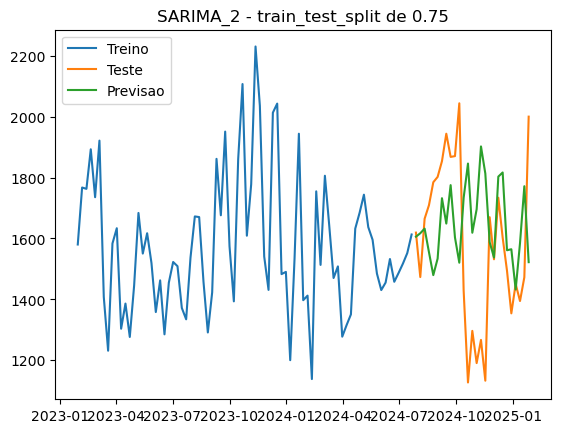

In [21]:
plt.plot(train.index, train['Radiacao (KJ/m²)'],label="Treino")
plt.plot(test.index, test['Radiacao (KJ/m²)'],label="Teste")
plt.plot(test.index, test['forecast_sarima_2'],label="Previsao")
plt.legend()
plt.title('SARIMA_2 - train_test_split de 0.75')
plt.show()

In [22]:
# Cálculo das métricas
mae = mean_absolute_error(test['Radiacao (KJ/m²)'], test['forecast_sarima_2'])
rmse = np.sqrt(mean_squared_error(test['Radiacao (KJ/m²)'], test['forecast_sarima_2']))
mape = mean_absolute_percentage_error(test['Radiacao (KJ/m²)'], test['forecast_sarima_2'])
# Exibe as métricas calculadas
print(f"The MAE is {mae:.2f}")
print(f"The RMSE is {rmse:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

The MAE is 259.97
The RMSE is 331.28
The MAPE is 17.95 %
